<a href="https://colab.research.google.com/github/Andrei-WongE/ML_sandbox/blob/origin/Class_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Mount Drive



In [ ]:
#Import drive library
from google.colab import drive

#mount location
drive.mount('/content/drive')

Mounted at /content/drive


#Change Working directory

In [ ]:
#OS from python
import os

mount = '/content/drive'
drive_root = mount + "/My Drive/Colab Notebooks/Applied ML"

# Create drive_root if it doesn't exist
create_drive_root = True
if create_drive_root:
  print("\nColab: making sure ", drive_root, " exists.")
  os.makedirs(drive_root, exist_ok=True)

# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root


Colab: making sure  /content/drive/My Drive/Colab Notebooks/Applied ML  exists.

Colab: Changing directory to  /content/drive/My Drive/Colab Notebooks/Applied ML
/content/drive/My Drive/Colab Notebooks/Applied ML


In [ ]:
# Check wd
!pwd

/content/drive/MyDrive/Colab Notebooks/Applied ML


# Visualisation

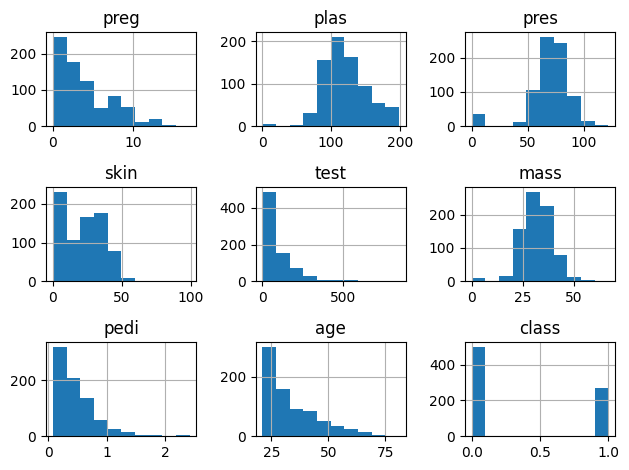

In [ ]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# set the spacing between subplots
data.hist(legend = False)
pyplot.tight_layout()
pyplot.show()

Density plot

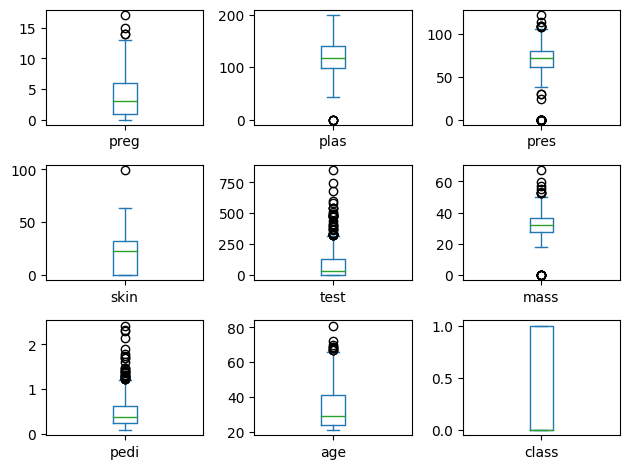

In [ ]:
# Univariate Density Plots
#data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

pyplot.tight_layout()
pyplot.show()

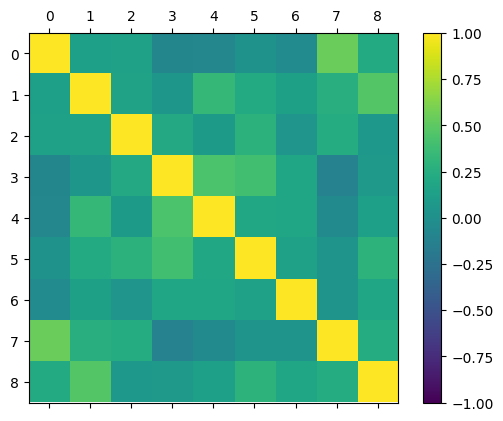

In [ ]:
# Correlation Matrix Plot
import numpy

correlations = data.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

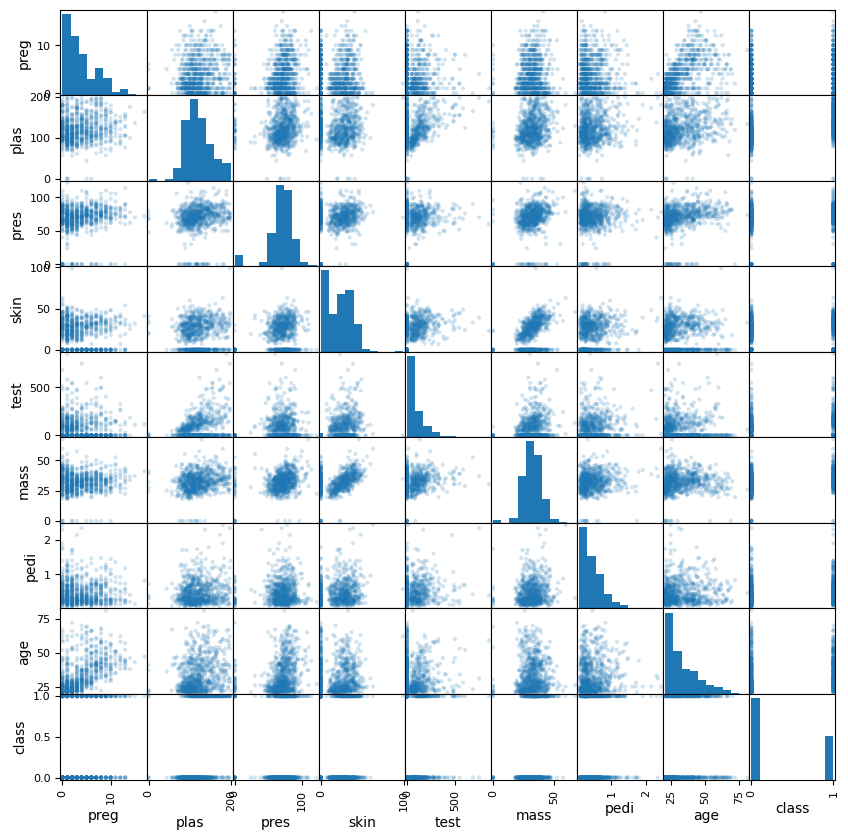

In [ ]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha = 0.2, grid = True, figsize = [10, 10])
pyplot.show()

#Data Preparation

Rescale Data

In [ ]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


Standardise Data

In [ ]:
# Standardise data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


<Axes: >

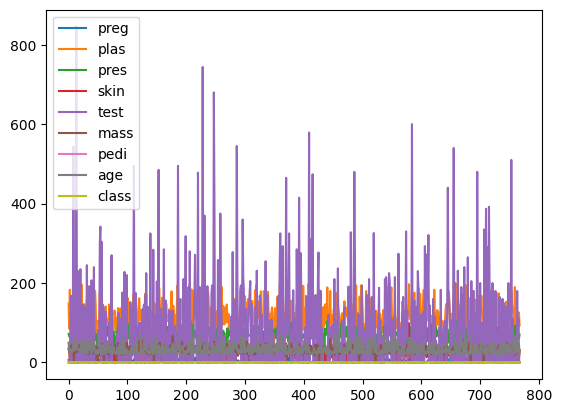

In [ ]:
dataframe.plot()

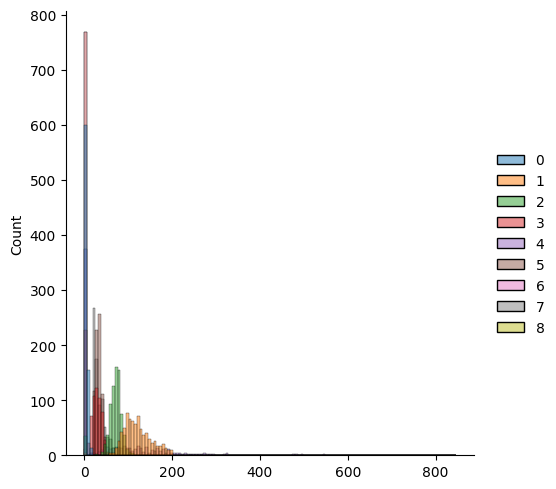

In [ ]:
import seaborn as sns

sns.displot(data = array)

Normalise Data

In [ ]:
# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(normalizedX[0:5,:])

[[0.03 0.83 0.4  0.2  0.   0.19 0.   0.28]
 [0.01 0.72 0.56 0.24 0.   0.22 0.   0.26]
 [0.04 0.92 0.32 0.   0.   0.12 0.   0.16]
 [0.01 0.59 0.44 0.15 0.62 0.19 0.   0.14]
 [0.   0.6  0.17 0.15 0.73 0.19 0.01 0.14]]


Binarise Data

In [ ]:
# binarisation
from sklearn.preprocessing import Binarizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
# Decision tree classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("Mean estimated accuracy \n",results.mean())

Mean estimated accuracy 
 0.6497778537252221
